If you want to read a good book and wondering what to read, then this notebook is for you! Here i will be looking into various exciting things related to books. **Please upvote if you liked it.**
This notebook contains following things:
* ** Data Pre-processing**
* **Data Visualisation**
1. Number of books in all the different languages
1. Top 10 most rated books
1. Top 10 books with most text reviews
1. Top 10 books with highest average rating
1. Author of most books
1. Average rating distribution of all books
1. Top 10 books with most pages
1. Top 10 highly rated authors

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))
df = pd.read_csv('../input/books.csv',error_bad_lines=False)


['books.csv']


b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [2]:
df.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613


In [3]:
df.shape #finding the number of rows and columns in the dataset

(13714, 10)

**Data Cleaning**

In [4]:
df.drop(['bookID','isbn','isbn13'],axis = 1,inplace=True) # dropping unnecessary columns
df.head(2)

,title,authors,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613


In [5]:
df.rename(columns={'# num_pages':'total_pages'},inplace=True) #renaming columns
df.head(2)

,title,authors,average_rating,language_code,total_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613


**Data Visualisation**

**Let's find the number of books in all the different languages.**

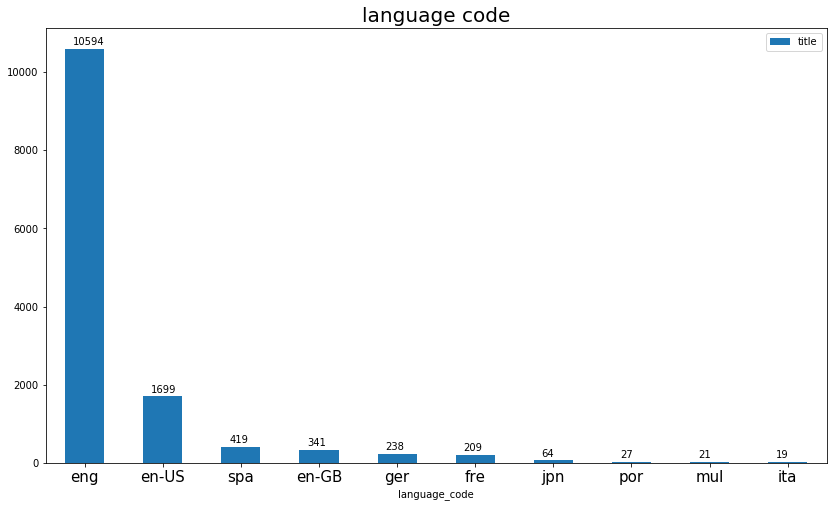

In [6]:
ax =df.groupby('language_code')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('language_code').plot.bar(figsize=(14,8),rot=0)
plt.title('language code',fontsize=20)
plt.xticks(fontsize=15)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+100))

**As we see that majority of the books are in English. So lets only concentrate on English books.**

In [7]:
df = df[(df.language_code =='eng')|(df.language_code =='eng-US')|(df.language_code =='eng-GB')] # selecting only English books
df.head(2)

,title,authors,average_rating,language_code,total_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613


**Top 10 most rated books**

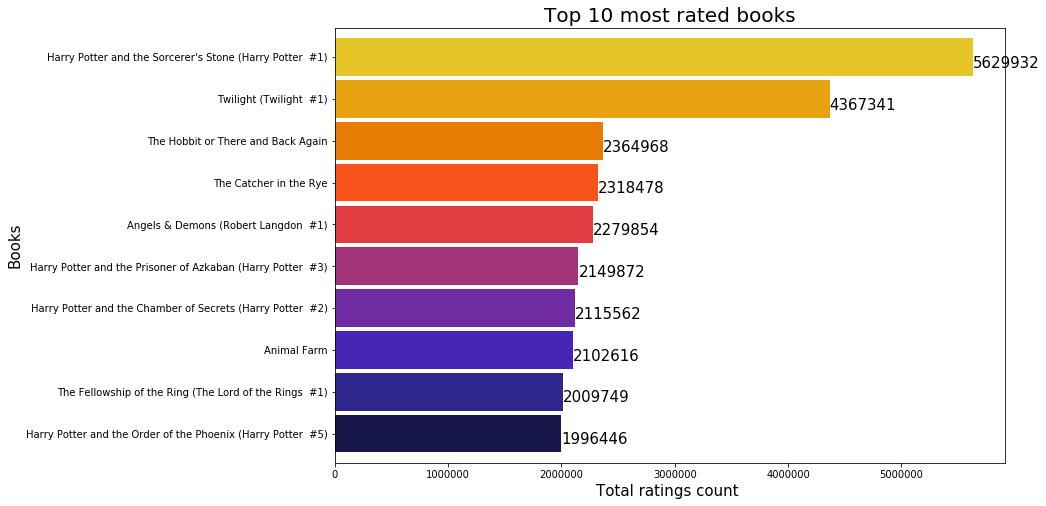

In [8]:

most_rated = df.sort_values('ratings_count',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_rated['ratings_count'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',12))
ax.set_xlabel("Total ratings count ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 most rated books",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

**As we see above, Harry Potter series dominates in the this list.**

**Top 10 books with most text reviews**

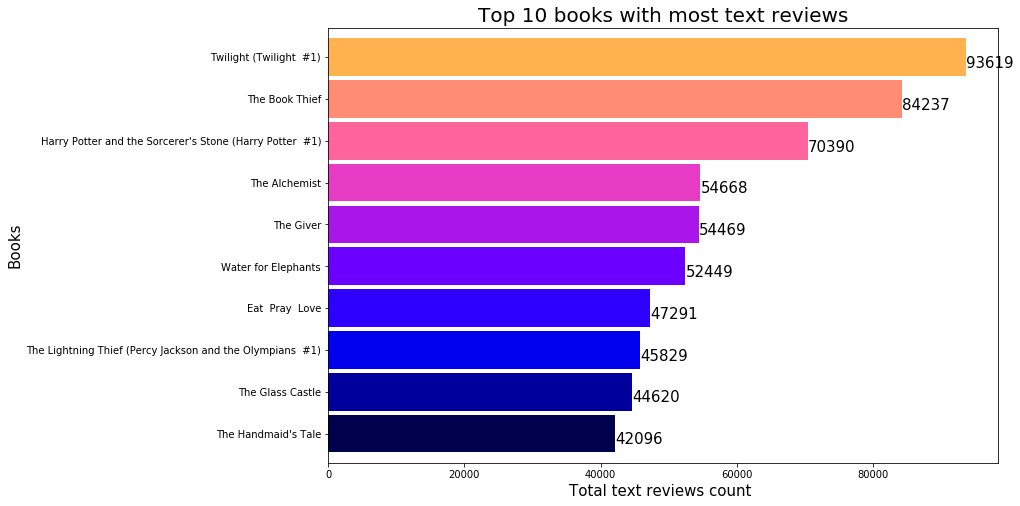

In [9]:
most_text_reviews = df.sort_values('text_reviews_count',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_text_reviews['text_reviews_count'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gnuplot2',12))
ax.set_xlabel("Total text reviews count ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 books with most text reviews",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

**Twilight has got most number of text reviews. But The Alchemist is my favorite!!**

**Top 10 books with highest average rating**

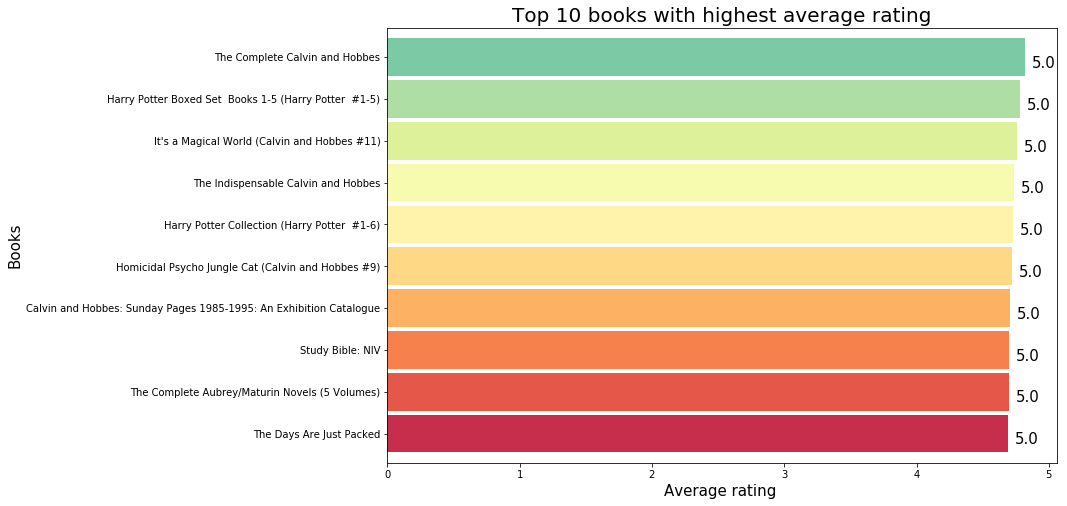

In [10]:
high_average_rating =df[df['ratings_count'] > 1000]
high_average_rating = high_average_rating.sort_values('average_rating',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = high_average_rating['average_rating'].sort_values().plot.barh(width=0.9,color=sns.color_palette('Spectral',12))
ax.set_xlabel("Average rating ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 books with highest average rating",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

**Author of most books**

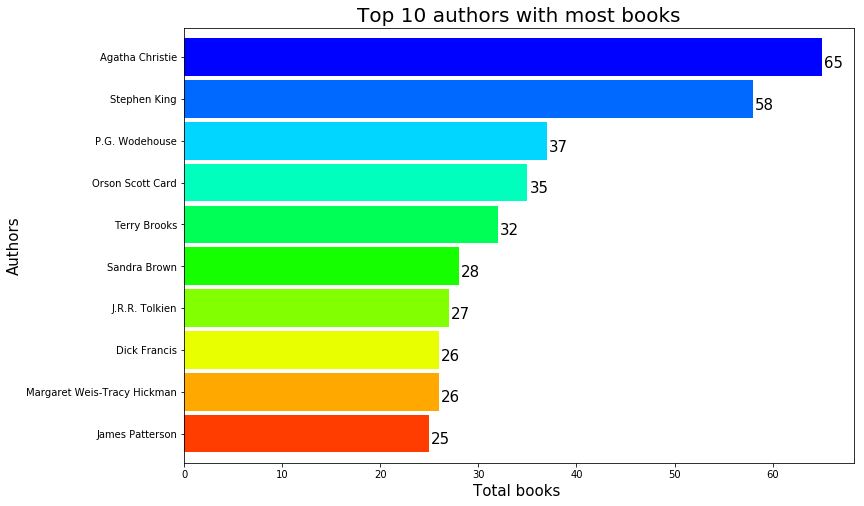

In [11]:
author_of_most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(12,8))
ax = author_of_most_books['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_rainbow',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 authors with most books",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

**Agatha Christie leads this list with 65 books!!! People just love mystery and detective novels! Don't they!**

**Average rating distribution of all books**

Now lets plot average rating of all books and see how it looks.

Text(0.5, 0, 'Average rating')

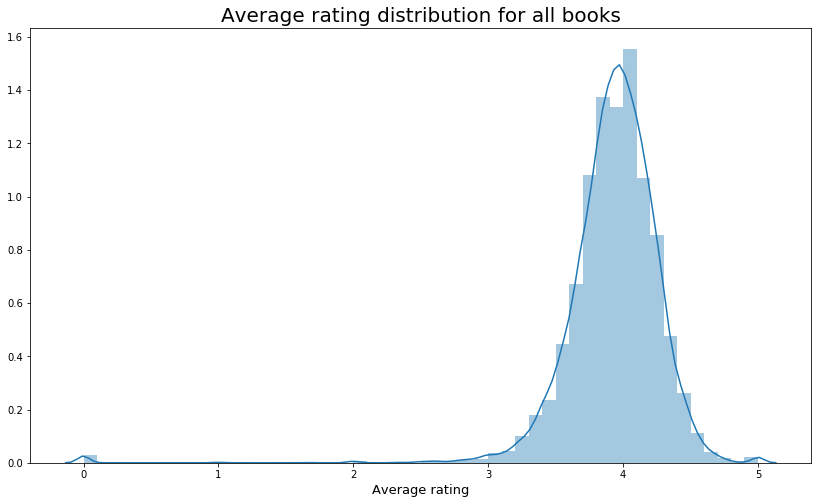

In [12]:
dist = df
dist.average_rating = dist.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(dist['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

**As we can see overall average rating of all the books available is around 4.0. Not bad at all!**

**Top 10 books with most pages**

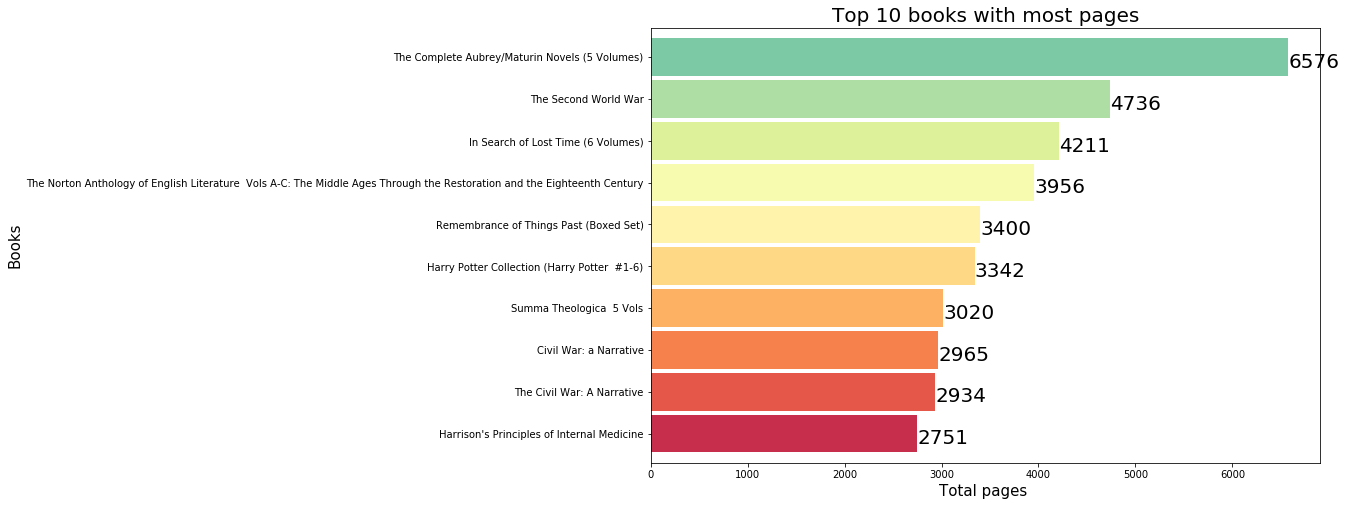

In [13]:

most_pages = df.sort_values('total_pages',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_pages['total_pages'].sort_values().plot.barh(width=0.9,color=sns.color_palette('Spectral',12))
ax.set_xlabel("Total pages ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 books with most pages",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.2,str(round(i.get_width())), fontsize=20,color='black')
plt.show()

**Omg!! There is a book with more than 6500 pages! I wonder how many people have actually read the entire book!**

**Top 10 highly rated authors**

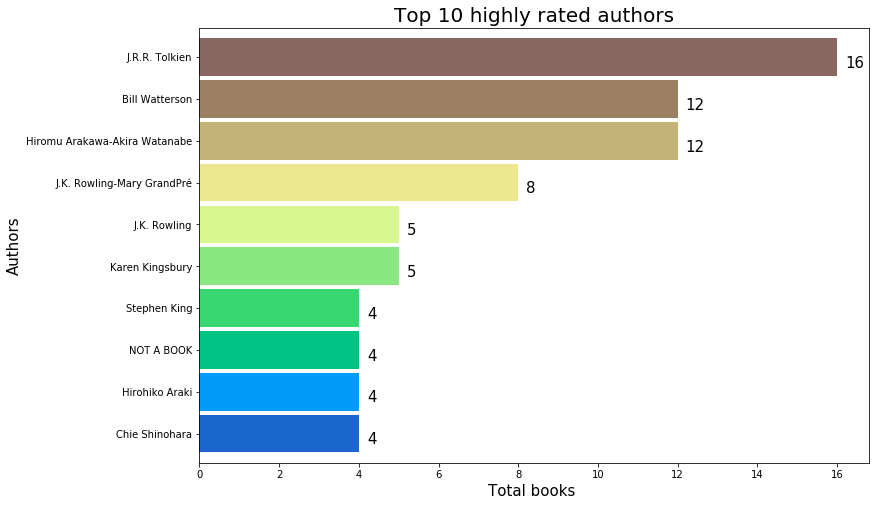

In [14]:
highly_rated_author =df[df['average_rating']>4.4]
highly_rated_author = highly_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(12,8))
ax = highly_rated_author['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('terrain',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 highly rated authors",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

**This is my first kaggle notebook.Hope it helped. Please leave your comments / suggestions below. Please upvote if you liked it.**